# Regresión logística 

La regresión logística es un método de clasificación dicotómica. Hace uso de la probabilidad condicional; ya que, establece una relación entre la probabilidad de que ocurra el suceso, dado los valores de algunas variables.

De manera general, el cálculo de la regresión logística es bajo la función:

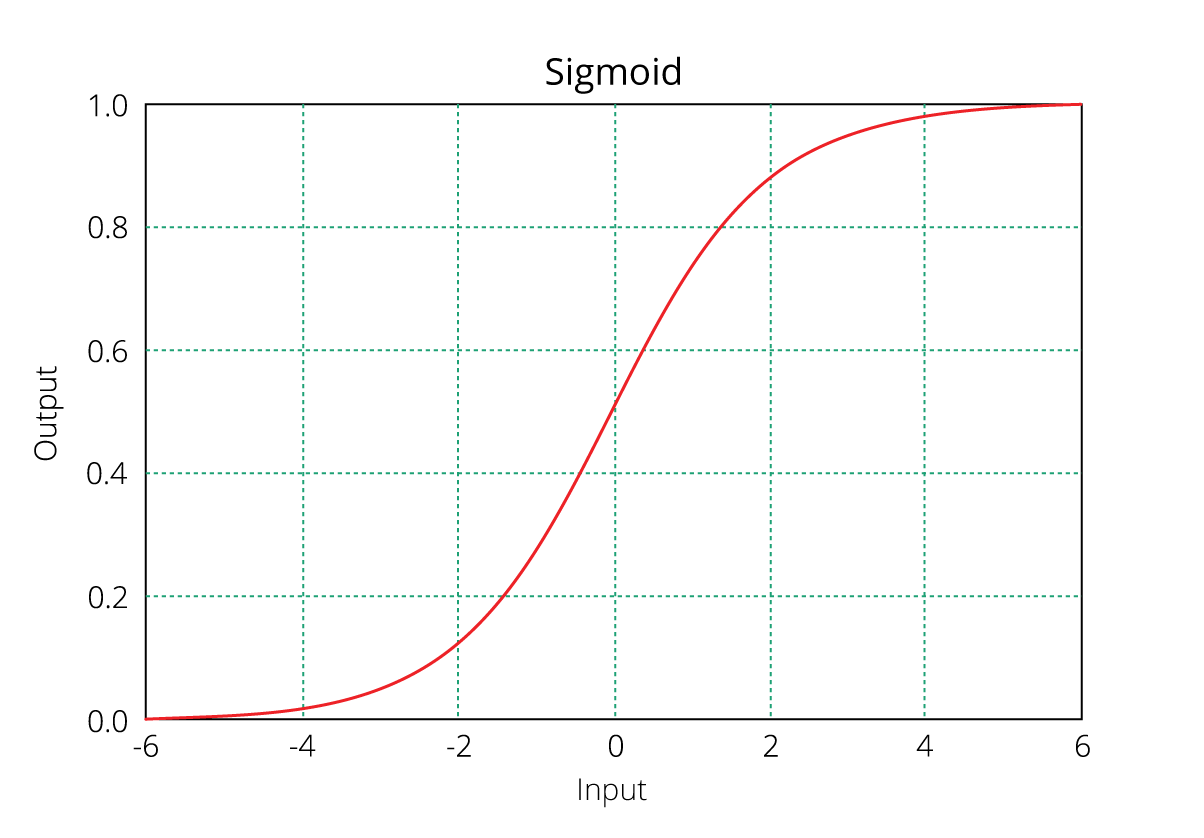

Matemáticamente se expresa:

<font size="6"> $f(x) = \frac{e^{(\sum{\beta x_{i}})}}{1 + e^{(\sum{\beta x_{i}})}} = \frac{1}{1 + e^{-(\sum{\beta x_{i}})}}$ </font>

El desarrollo teórico queda por el lector

Links de información:

1. http://halweb.uc3m.es/esp/Personal/personas/amalonso/esp/bstat-tema9.pdf
2. https://rpubs.com/Edimer/540368
3. https://n9.cl/ytcq3

## Implementación

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

### Carga de librerías 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import pickle
import warnings
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Definimos las rutas del dataset

In [2]:
ruta_input="C:/Users/Omar/Desktop/Omar/Temas data science/Bases/Credit car"

In [3]:
base_input=pd.read_excel(os.path.join(ruta_input,"default of credit card clients.xls"),header=1)

Veamos la data

In [4]:
base_input.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Veamos los tipos de datos de las variables

In [5]:
base_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

Renombramos los campos del dataset

In [6]:
base_input=base_input.iloc[:,1:]

In [7]:
colum_base=["credito_otorgado($)","genero","educacion","estado_civil","edad","marca_pago_mes_6","marca_pago_mes_5",
            "marca_pago_mes_4","marca_pago_mes_3","marca_pago_mes_2","marca_pago_mes_1","estado_cuenta_mes_6($)",
            "estado_cuenta_mes_5($)","estado_cuenta_mes_4($)","estado_cuenta_mes_3($)","estado_cuenta_mes_2($)",
            "estado_cuenta_mes_1($)","monto_pago_anterior_6($)","monto_pago_anterior_5($)","monto_pago_anterior_4($)",
            "monto_pago_anterior_3($)","monto_pago_anterior_2($)","monto_pago_anterior_1($)","incumplimiento_sgte_mes"]

In [8]:
base_input.columns=colum_base

In [9]:
base_input.columns

Index(['credito_otorgado($)', 'genero', 'educacion', 'estado_civil', 'edad',
       'marca_pago_mes_6', 'marca_pago_mes_5', 'marca_pago_mes_4',
       'marca_pago_mes_3', 'marca_pago_mes_2', 'marca_pago_mes_1',
       'estado_cuenta_mes_6($)', 'estado_cuenta_mes_5($)',
       'estado_cuenta_mes_4($)', 'estado_cuenta_mes_3($)',
       'estado_cuenta_mes_2($)', 'estado_cuenta_mes_1($)',
       'monto_pago_anterior_6($)', 'monto_pago_anterior_5($)',
       'monto_pago_anterior_4($)', 'monto_pago_anterior_3($)',
       'monto_pago_anterior_2($)', 'monto_pago_anterior_1($)',
       'incumplimiento_sgte_mes'],
      dtype='object')

Veamos si el target está balanceado

In [10]:
print('porc. no')
print((base_input['incumplimiento_sgte_mes'][base_input['incumplimiento_sgte_mes']==0].count())/(base_input.shape[0]))
print('porc. si')
print((base_input['incumplimiento_sgte_mes'][base_input['incumplimiento_sgte_mes']==1].count())/(base_input.shape[0]))

porc. no
0.7788
porc. si
0.2212


Notamos desbalanceo, asi que tendremos que balancear más adelante para el entrenamiento.

### Análisis descriptivo de los datos 

Veamos los histogramas

In [11]:
base_input.iloc[:,:-1].describe()

,credito_otorgado($),genero,educacion,estado_civil,edad,marca_pago_mes_6,marca_pago_mes_5,marca_pago_mes_4,marca_pago_mes_3,marca_pago_mes_2,...,estado_cuenta_mes_4($),estado_cuenta_mes_3($),estado_cuenta_mes_2($),estado_cuenta_mes_1($),monto_pago_anterior_6($),monto_pago_anterior_5($),monto_pago_anterior_4($),monto_pago_anterior_3($),monto_pago_anterior_2($),monto_pago_anterior_1($)
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


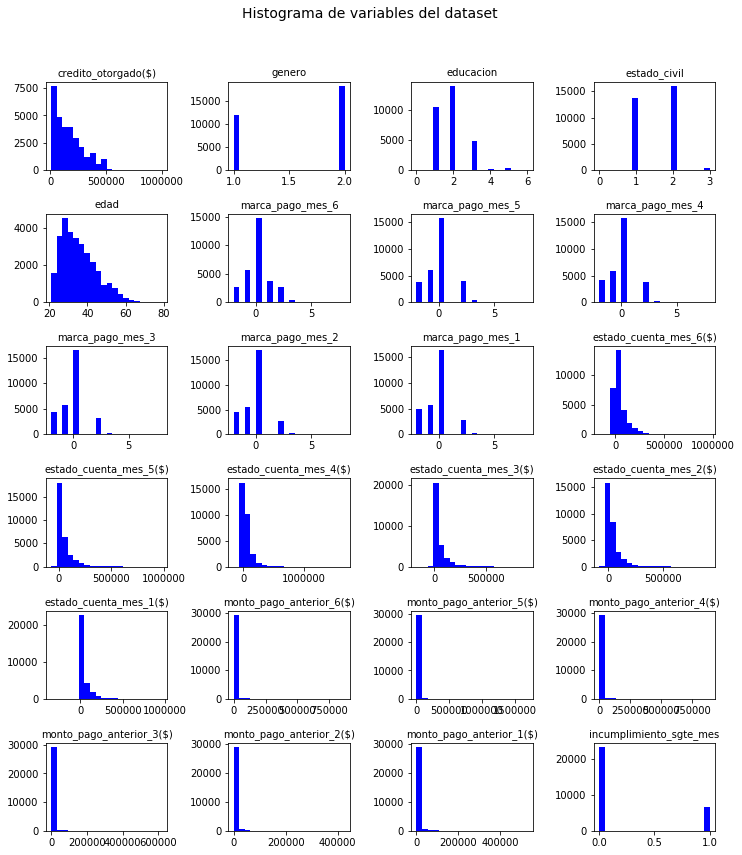

In [12]:
fig, axs = plt.subplots(6, 4,figsize=(12,13))
plt.suptitle('Histograma de variables del dataset', fontsize=14)
var=base_input.columns.to_list() 
axs = axs.ravel()

for k,i in zip(var,range(0,len(var))):
    axs[i].hist(base_input[k],color='blue', bins=20)
    axs[i].set_title(k,fontsize=10)
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)    

Veamos boxplots de las variables para reafirmar los outliers

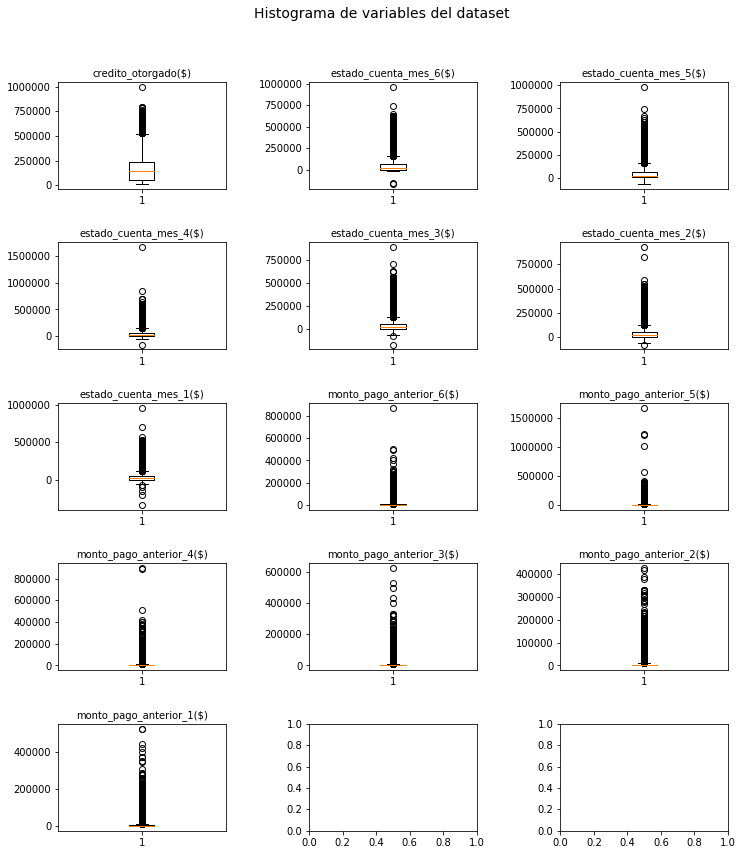

In [13]:
fig, axs = plt.subplots(5, 3,figsize=(12,13))
plt.suptitle('Histograma de variables del dataset', fontsize=14)
var=['credito_otorgado($)','estado_cuenta_mes_6($)','estado_cuenta_mes_5($)','estado_cuenta_mes_4($)','estado_cuenta_mes_3($)',
    'estado_cuenta_mes_2($)','estado_cuenta_mes_1($)','monto_pago_anterior_6($)','monto_pago_anterior_5($)','monto_pago_anterior_4($)',
    'monto_pago_anterior_3($)','monto_pago_anterior_2($)','monto_pago_anterior_1($)']
axs = axs.ravel()

for k,i in zip(var,range(0,len(var))):
    axs[i].boxplot(base_input[k])
    axs[i].set_title(k,fontsize=10)
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)    

**Análisis bivariado de las variables**

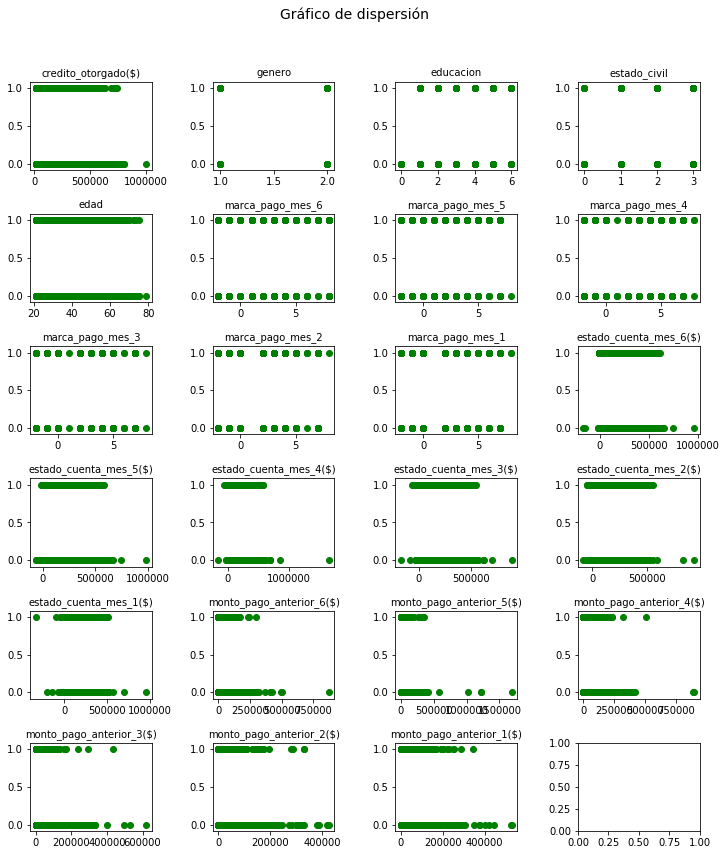

In [14]:
fig, axs = plt.subplots(6,4, figsize=(12,13))
plt.suptitle('Gráfico de dispersión', fontsize=14)
var=base_input.iloc[:,:-1].columns.to_list() 

axs = axs.ravel()

for k,i in zip(var,range(0,len(var))):
    axs[i].scatter(base_input[k],base_input.iloc[:,-1],color='green')
    axs[i].set_title(k,fontsize=10)
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)   

### Featuring engineering

Generemos variables que tengan "más sentido", hay variables no ordinales (ejm: género) que está definifo de forma numérica.

* Género (1 = masculino; 2 = femenino).
* Educación (1 = posgrado; 2 = universidad; 3 = bachillerato; 4 = otros).
* Estado civil (1 = casado; 2 = soltero; 3 = otros).

Para esas variables usaremos el método de **one hot encoding**

https://interactivechaos.com/es/manual/tutorial-de-machine-learning/one-hot-encoding

In [15]:
base_input.loc[base_input['genero']==1,'genero']='masculino'
base_input.loc[base_input['genero']==2,'genero']='femenino'
base_input.loc[(base_input['educacion']>3) | (base_input['educacion']==0),'educacion']='otros'
base_input.loc[base_input['educacion']==1,'educacion']='posgrado'
base_input.loc[base_input['educacion']==2,'educacion']='universidad'
base_input.loc[base_input['educacion']==3,'educacion']='bachillerato'
base_input.loc[(base_input['estado_civil']==3) | (base_input['estado_civil']==0),'estado_civil']='otros'
base_input.loc[base_input['estado_civil']==1,'estado_civil']='casado'
base_input.loc[base_input['estado_civil']==2,'estado_civil']='soltero'

In [16]:
base_dummies=pd.get_dummies(base_input[['genero','educacion','estado_civil']])
base_input=pd.concat([base_input,base_dummies],axis=1)
base_input.drop(columns=["genero","educacion","estado_civil","edad"],inplace=True)

In [17]:
base_input.head()

,credito_otorgado($),marca_pago_mes_6,marca_pago_mes_5,marca_pago_mes_4,marca_pago_mes_3,marca_pago_mes_2,marca_pago_mes_1,estado_cuenta_mes_6($),estado_cuenta_mes_5($),estado_cuenta_mes_4($),...,incumplimiento_sgte_mes,genero_femenino,genero_masculino,educacion_bachillerato,educacion_otros,educacion_posgrado,educacion_universidad,estado_civil_casado,estado_civil_otros,estado_civil_soltero
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,...,1,1,0,0,0,0,1,1,0,0
1,120000,-1,2,0,0,0,2,2682,1725,2682,...,1,1,0,0,0,0,1,0,0,1
2,90000,0,0,0,0,0,0,29239,14027,13559,...,0,1,0,0,0,0,1,0,0,1
3,50000,0,0,0,0,0,0,46990,48233,49291,...,0,1,0,0,0,0,1,1,0,0
4,50000,-1,0,-1,0,0,0,8617,5670,35835,...,0,0,1,0,0,0,1,1,0,0


In [18]:
base_input.shape

(30000, 29)

Estandarización de las variables

In [19]:
base=base_input.copy()
X=base_input.drop(columns=["incumplimiento_sgte_mes"])

In [20]:
Y=base_input[["incumplimiento_sgte_mes"]]
Y['incumplimiento_sgte_mes']=Y['incumplimiento_sgte_mes'].apply(int)

C:\Users\Omar\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)
X_scaler = pd.DataFrame(X_scaler)
X_scaler.columns = X.columns

In [22]:
X_scaler.describe()

,credito_otorgado($),marca_pago_mes_6,marca_pago_mes_5,marca_pago_mes_4,marca_pago_mes_3,marca_pago_mes_2,marca_pago_mes_1,estado_cuenta_mes_6($),estado_cuenta_mes_5($),estado_cuenta_mes_4($),...,monto_pago_anterior_1($),genero_femenino,genero_masculino,educacion_bachillerato,educacion_otros,educacion_posgrado,educacion_universidad,estado_civil_casado,estado_civil_otros,estado_civil_soltero
count,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.159075,0.19833,0.186623,0.183380,0.177933,0.173380,0.170890,0.191846,0.112893,0.112157,...,0.009865,0.603733,0.396267,0.163900,0.015600,0.352833,0.467667,0.455300,0.012567,0.532133
std,0.131058,0.11238,0.119719,0.119687,0.116914,0.113319,0.114999,0.065159,0.067546,0.038076,...,0.033627,0.489129,0.489129,0.370191,0.123924,0.477859,0.498962,0.498006,0.111396,0.498975
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040404,0.10000,0.100000,0.100000,0.100000,0.100000,0.100000,0.149668,0.069053,0.087808,...,0.000223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.131313,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,0.166324,0.086340,0.097374,...,0.002837,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.232323,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,0.205887,0.126964,0.119378,...,0.007566,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Veamos la correlación de las variables

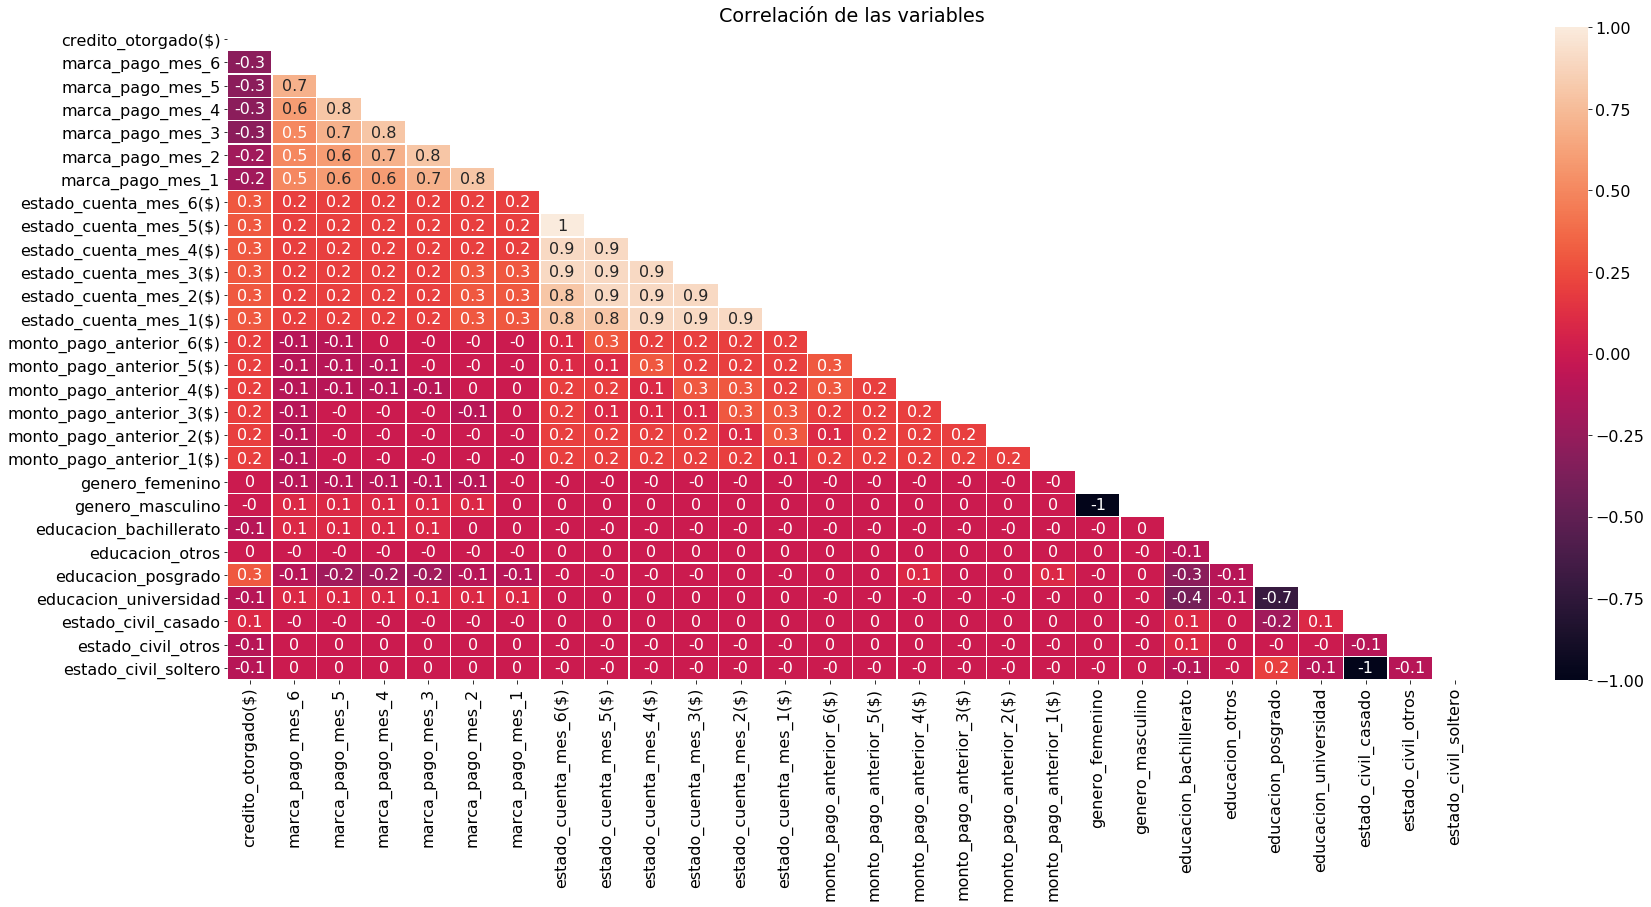

In [23]:
plt.rcParams['figure.figsize']=28,12
plt.rcParams['font.size'] = 16

with sns.axes_style("white"):
    temp=np.round(X_scaler.corr(),1)
    
    mask = np.zeros_like(temp)
    mask[np.triu_indices_from(mask)] = True
    
sns.heatmap(temp,mask=mask,annot=True,fmt='.3g', linewidths=.4)
plt.title("Correlación de las variables")
plt.show()

Análisis bivariado de correlación

In [24]:
var=base_input.columns.to_list()
var.remove('incumplimiento_sgte_mes')
target='incumplimiento_sgte_mes'

for i in var:
    cor=base_input[[i,target]].corr(method='spearman')
    cor_2=cor[target][0]
    print("La correlación entre "+i+" y "+target+ " es: ",np.round(cor_2,2))

La correlación entre credito_otorgado($) y incumplimiento_sgte_mes es:  -0.17
La correlación entre marca_pago_mes_6 y incumplimiento_sgte_mes es:  0.29
La correlación entre marca_pago_mes_5 y incumplimiento_sgte_mes es:  0.22
La correlación entre marca_pago_mes_4 y incumplimiento_sgte_mes es:  0.19
La correlación entre marca_pago_mes_3 y incumplimiento_sgte_mes es:  0.17
La correlación entre marca_pago_mes_2 y incumplimiento_sgte_mes es:  0.16
La correlación entre marca_pago_mes_1 y incumplimiento_sgte_mes es:  0.14
La correlación entre estado_cuenta_mes_6($) y incumplimiento_sgte_mes es:  -0.03
La correlación entre estado_cuenta_mes_5($) y incumplimiento_sgte_mes es:  -0.02
La correlación entre estado_cuenta_mes_4($) y incumplimiento_sgte_mes es:  -0.01
La correlación entre estado_cuenta_mes_3($) y incumplimiento_sgte_mes es:  -0.01
La correlación entre estado_cuenta_mes_2($) y incumplimiento_sgte_mes es:  -0.01
La correlación entre estado_cuenta_mes_1($) y incumplimiento_sgte_mes es:

Esta vez seleccionaremos un grupo de variables tentativas para el modelo por medio de la correlación,denimos como variables a excluir las que tengan mas de 0.8 y menos de -0.8.

Cabe mencionar, que se combina este método con el calculo del IV o del gini para cuando una variable este correlacionada con más de una, se pueda elegir la que mejor **discrimine respecto al target**. Para no complicarnos, por el momento, solo aplicaremos correlación.

In [25]:
correlacion=np.round(X_scaler.corr(),2)
correlacion=np.round(X_scaler.corr(),2)
correlacion = correlacion.unstack().sort_values() 
correlacion=pd.DataFrame(correlacion).reset_index()

In [26]:
correlacion.columns=['var1','var2','cor']
var_nocor=correlacion.loc[(correlacion['cor']>-0.1) & (correlacion['cor']<0.1),'var1'].unique()

In [27]:
print(var_nocor)

['credito_otorgado($)' 'estado_civil_soltero' 'educacion_otros'
 'educacion_posgrado' 'monto_pago_anterior_6($)' 'marca_pago_mes_5'
 'marca_pago_mes_6' 'marca_pago_mes_3' 'monto_pago_anterior_4($)'
 'monto_pago_anterior_5($)' 'genero_femenino' 'marca_pago_mes_4'
 'educacion_bachillerato' 'monto_pago_anterior_2($)'
 'monto_pago_anterior_3($)' 'estado_civil_otros' 'marca_pago_mes_2'
 'educacion_universidad' 'monto_pago_anterior_1($)' 'marca_pago_mes_1'
 'estado_cuenta_mes_5($)' 'estado_cuenta_mes_3($)'
 'estado_cuenta_mes_2($)' 'estado_cuenta_mes_1($)'
 'estado_cuenta_mes_6($)' 'estado_civil_casado' 'genero_masculino'
 'estado_cuenta_mes_4($)']


In [28]:
X_scaler2=X_scaler[var_nocor]
X_scaler2.head()

,credito_otorgado($),estado_civil_soltero,educacion_otros,educacion_posgrado,monto_pago_anterior_6($),marca_pago_mes_5,marca_pago_mes_6,marca_pago_mes_3,monto_pago_anterior_4($),monto_pago_anterior_5($),...,monto_pago_anterior_1($),marca_pago_mes_1,estado_cuenta_mes_5($),estado_cuenta_mes_3($),estado_cuenta_mes_2($),estado_cuenta_mes_1($),estado_cuenta_mes_6($),estado_civil_casado,genero_masculino,estado_cuenta_mes_4($)
0,0.010101,0.0,0.0,0.0,0.000000,0.4,0.4,0.1,0.000000,0.000409,...,0.000000,0.0,0.069164,0.160138,0.080648,0.260979,0.149982,1.0,0.0,0.086723
1,0.111111,1.0,0.0,0.0,0.000000,0.4,0.1,0.2,0.001116,0.000594,...,0.003783,0.4,0.067858,0.163220,0.084074,0.263485,0.148892,0.0,0.0,0.087817
2,0.080808,1.0,0.0,0.0,0.001738,0.2,0.2,0.2,0.001116,0.000891,...,0.009458,0.2,0.079532,0.173637,0.095470,0.272928,0.172392,0.0,0.0,0.093789
3,0.040404,0.0,0.0,0.0,0.002290,0.2,0.2,0.2,0.001339,0.001199,...,0.001892,0.2,0.111995,0.186809,0.109363,0.283685,0.188100,1.0,0.0,0.113407
4,0.040404,0.0,0.0,0.0,0.002290,0.2,0.1,0.2,0.011160,0.021779,...,0.001284,0.2,0.071601,0.179863,0.099633,0.275681,0.154144,1.0,1.0,0.106020


### Implementación del modelo

Primero, separo dataset de entrenamiento y prueba

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler2, Y, test_size=0.3, random_state=22)
columns = X_train.columns

Una buena práctica es revisar el p-valor de las variables en el modelo. Para ello, usamos la regresión logística que está incluida en la librería **stastmodel**.

Usamos el modelo de statsmodel para ver el p-valor de las variables.

In [30]:
x_train_stast=sm.add_constant(X_train)

In [31]:
modelo_logistico=sm.Logit(y_train.values.ravel(),x_train_stast)
result_modelo_logistico_1=modelo_logistico.fit()

print(result_modelo_logistico_1.summary2())

Optimization terminated successfully.
         Current function value: 0.465361
         Iterations 18
                                     Results: Logit
Model:                       Logit                   Pseudo R-squared:        0.121     
Dependent Variable:          y                       AIC:                     19597.1474
Date:                        2021-08-17 09:04        BIC:                     19803.9067
No. Observations:            21000                   Log-Likelihood:          -9772.6   
Df Model:                    25                      LL-Null:                 -11115.   
Df Residuals:                20974                   LLR p-value:             0.0000    
Converged:                   1.0000                  Scale:                   1.0000    
No. Iterations:              18.0000                                                    
----------------------------------------------------------------------------------------
                          Coef.     Std.Err.

Notamos que algunas variables tiene **p-valor>0.05**; entonces, reduciremos las variables input para entrenar nuestro modelo con sklearn

In [32]:
for i in zip(x_train_stast.columns,result_modelo_logistico_1.pvalues):
    print(i)

('const', 0.9999993469427715)
('credito_otorgado($)', 7.428534876854029e-05)
('estado_civil_soltero', 0.9999997156030824)
('educacion_otros', 0.9999995453653348)
('educacion_posgrado', 0.9999999788980868)
('monto_pago_anterior_6($)', 5.9695774862122345e-06)
('marca_pago_mes_5', 0.0003967281148344828)
('marca_pago_mes_6', 1.7943478962894484e-162)
('marca_pago_mes_3', 0.7690593597284667)
('monto_pago_anterior_4($)', 0.048486647982728504)
('monto_pago_anterior_5($)', 0.001993552226652756)
('genero_femenino', 0.9999996865449544)
('marca_pago_mes_4', 0.003239556145902881)
('educacion_bachillerato', 0.9999999889910813)
('monto_pago_anterior_2($)', 0.004084624401891459)
('monto_pago_anterior_3($)', 0.3206303044385427)
('estado_civil_otros', 0.9999997443637166)
('marca_pago_mes_2', 0.05435440000974625)
('educacion_universidad', 0.9999999838722813)
('monto_pago_anterior_1($)', 0.22351571011114224)
('marca_pago_mes_1', 0.83213434711496)
('estado_cuenta_mes_5($)', 0.038999654395341414)
('estado_c

In [33]:
var_modelo_1=['credito_otorgado($)','monto_pago_anterior_6($)','marca_pago_mes_5','marca_pago_mes_4','marca_pago_mes_6',
             'monto_pago_anterior_4($)','monto_pago_anterior_5($)','monto_pago_anterior_2($)','estado_cuenta_mes_5($)',
             'estado_cuenta_mes_6($)']
len(var_modelo_1)

10

In [35]:
x_train_stast=x_train_stast[var_modelo_1]
modelo_logistico_2=sm.Logit(y_train.values.ravel(),x_train_stast)
result_modelo_logistico_2=modelo_logistico_2.fit()

print(result_modelo_logistico_2.summary2())

Optimization terminated successfully.
         Current function value: 0.471612
         Iterations 8
                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.109     
Dependent Variable:      y                   AIC:                 19827.6965
Date:                    2021-08-17 09:05    BIC:                 19907.2193
No. Observations:        21000               Log-Likelihood:      -9903.8   
Df Model:                9                   LL-Null:             -11115.   
Df Residuals:            20990               LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                          Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------------
credi

**Implementamos el modelo con sklearn**

Entrenamos el modelo:

In [42]:
X_train=X_train[var_modelo_1]

In [43]:
modelo_logistico_3 = LogisticRegression(random_state=1)
modelo_logistico_3.fit(X_train, y_train.values.ravel())

LogisticRegression(random_state=1)

Predecimos el **y** con la data de prueba

In [44]:
X_test=X_test[var_modelo_1]

In [46]:
prediccion_1 = modelo_logistico_3.predict(X_test)
print('Precisión (accuracy) del modelo: ',modelo_logistico_3.score(X_test, y_test))

Precisión (accuracy) del modelo:  0.808


**Evaluación del modelo**

Lo más usual para ver el desempeño de los modelos es usando métricas que se obtienen de la matriz de confusión. Podemos revisarlo en el siguiente link: https://www.juanbarrios.com/la-matriz-de-confusion-y-sus-metricas/

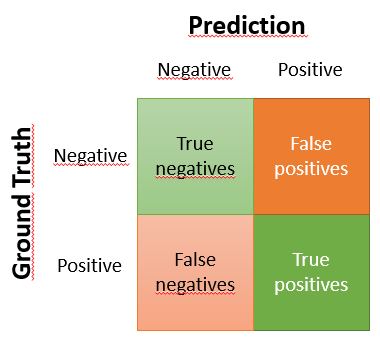

https://interactivechaos.com/es/manual/tutorial-de-machine-learning/disposicion-de-la-matriz-de-confusion

In [47]:
labels = np.array([0, 1])
confusion_matrix_1 = confusion_matrix(y_test, prediccion_1, labels = labels)
pd.DataFrame(confusion_matrix_1, index = labels, columns = labels)

,0,1
0,6862,162
1,1566,410


In [48]:
print(classification_report(y_test, prediccion_1))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      7024
           1       0.72      0.21      0.32      1976

    accuracy                           0.81      9000
   macro avg       0.77      0.59      0.60      9000
weighted avg       0.79      0.81      0.76      9000



Veamos la curva ROC, que no es más que una representación gráfica de la sensibilidad frente a la especificidad para un sistema clasificador binario según se varía el umbral de discriminación. (wikipedia)

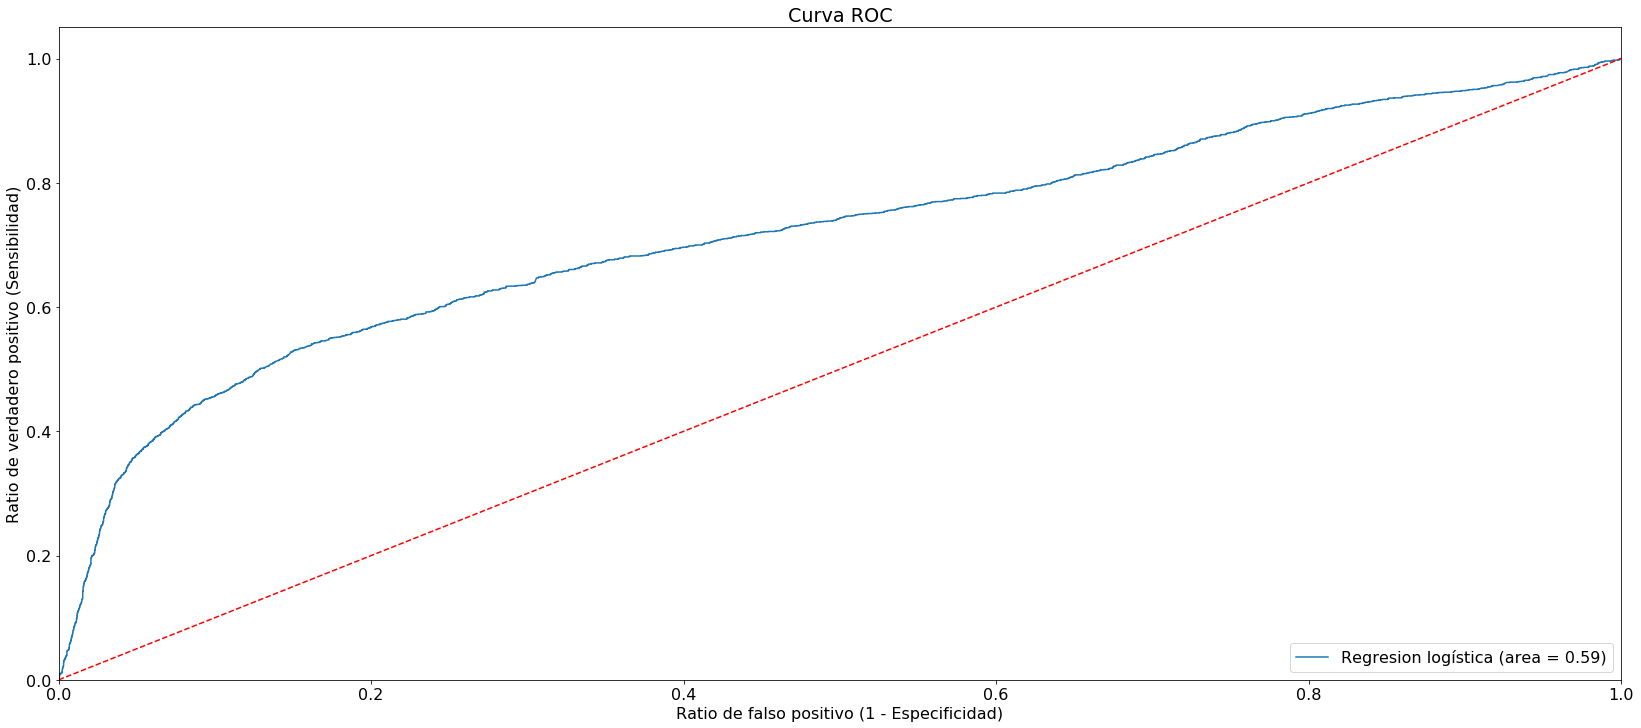

In [49]:
curva_roc = roc_auc_score(y_test, modelo_logistico_3.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, modelo_logistico_3.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regresion logística (area = %0.2f)' % curva_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de falso positivo (1 - Especificidad)')
plt.ylabel('Ratio de verdadero positivo (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.savefig('Curva_roc')
plt.show()

Notamos, que el **"desbalanceo"** en el target esta afectando el rendimiento del modelo, para nuestro caso no estamos detectando bien a los que incumplirían en el pago del crédito. ¿Que podemos hacer para mejorar el rendimiento?

### Balanceo del target

Según vimos al inicio, hay una disparidad entre los elementos del target; es por ello, que usaremos el método **smote** para nivelar los registros del elemento menor. Esto se hará en el dataset de entrenamiento para no afectar al modelo.

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [50]:
bal = SMOTE(random_state=23)
databal_X,databal_y= bal.fit_resample(X_train, y_train.values.ravel())
columns=X_train.columns.to_list()
databal_X = pd.DataFrame(data=databal_X,columns=columns )
databal_y= pd.DataFrame(data=databal_y,columns=['y'])

print("Tamaño de X_train: ",len(X_train))
print("Tamaño de bal_data_x: ",len(databal_X))

Tamaño de X_train:  21000
Tamaño de bal_data_x:  32680


In [51]:
print("cantidad de registros 0:",len(databal_y[databal_y['y']==0]))
print("cantidad de registros 1:",len(databal_y[databal_y['y']==1]))

cantidad de registros 0: 16340
cantidad de registros 1: 16340


**Implementando el modelo con skelearn**

In [52]:
print(X_train.shape)
print(databal_X.shape)

(21000, 10)
(32680, 10)


In [53]:
modelo_logistico_4 = LogisticRegression()
modelo_logistico_4.fit(databal_X, databal_y.values.ravel())

LogisticRegression()

In [54]:
prediccion_2 = modelo_logistico_4.predict(X_test)
print('Precisión (accuracy) del modelo: ',modelo_logistico_4.score(X_test, y_test))

Precisión (accuracy) del modelo:  0.6734444444444444


**Evaluación del modelo**

In [55]:
y_test_vc=pd.DataFrame(y_test)
y_test_vc['incumplimiento_sgte_mes'].value_counts()

0    7024
1    1976
Name: incumplimiento_sgte_mes, dtype: int64

In [56]:
labels = np.array([0, 1])
confusion_matrix_2 = confusion_matrix(y_test, prediccion_2, labels = labels)
pd.DataFrame(confusion_matrix_2, index = labels, columns = labels)

,0,1
0,4746,2278
1,661,1315


In [57]:
print(classification_report(y_test, prediccion_2))

              precision    recall  f1-score   support

           0       0.88      0.68      0.76      7024
           1       0.37      0.67      0.47      1976

    accuracy                           0.67      9000
   macro avg       0.62      0.67      0.62      9000
weighted avg       0.77      0.67      0.70      9000



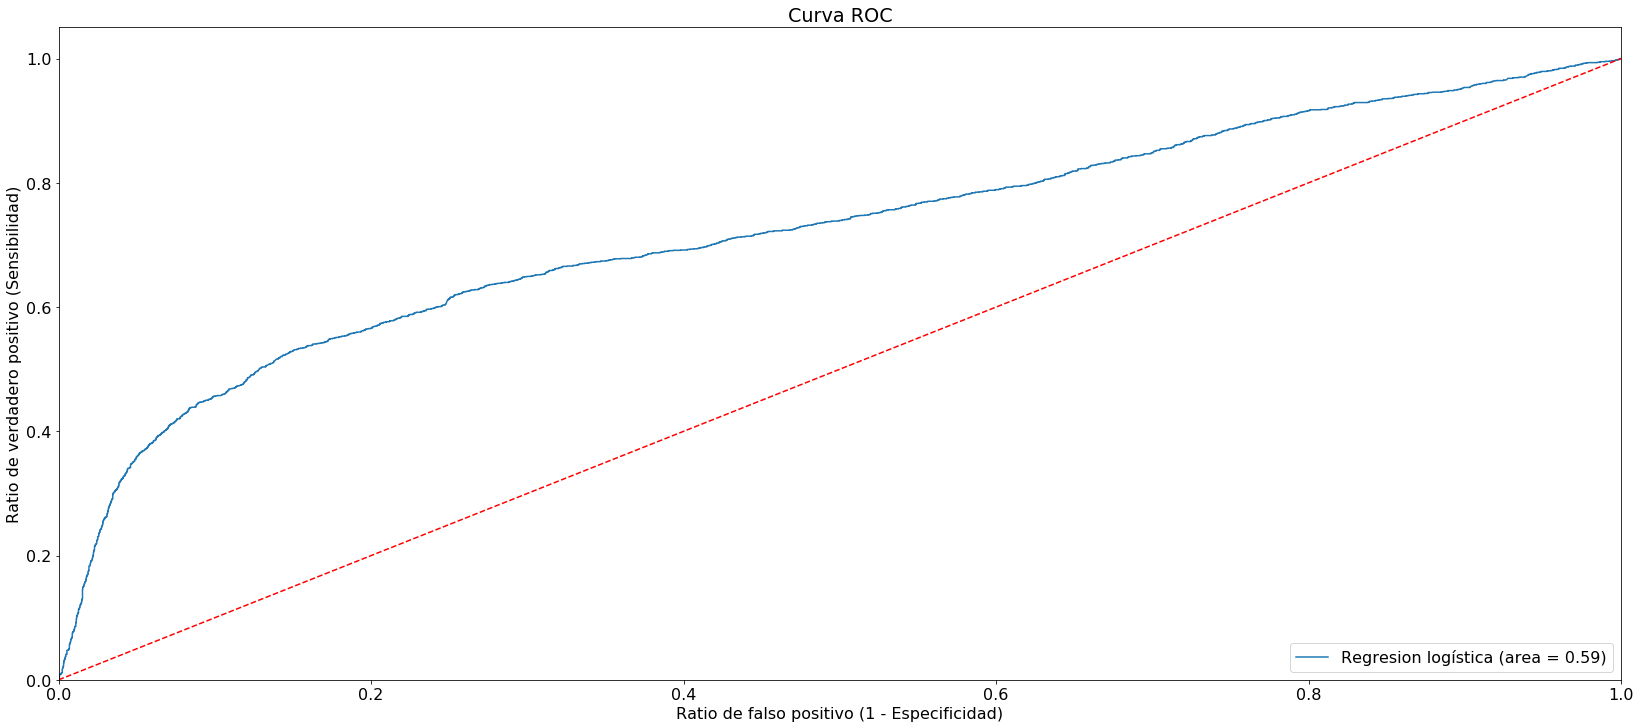

In [58]:
curva_roc_2 = roc_auc_score(y_test, modelo_logistico_4.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, modelo_logistico_4.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regresion logística (area = %0.2f)' % curva_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de falso positivo (1 - Especificidad)')
plt.ylabel('Ratio de verdadero positivo (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.savefig('Curva_roc')
plt.show()

¿Al usar el smote el modelo mejoró?

Comparemos los modelos:

In [59]:
acc=(confusion_matrix_1[0][0]+confusion_matrix_1[1][1])/(confusion_matrix_1[0][0]+confusion_matrix_1[0][1]+confusion_matrix_1[1][0]+confusion_matrix_1[1][1])
acc_2=(confusion_matrix_2[0][0]+confusion_matrix_2[1][1])/(confusion_matrix_2[0][0]+confusion_matrix_2[0][1]+confusion_matrix_2[1][0]+confusion_matrix_2[1][1])
##
prec=(confusion_matrix_1[1][1])/(confusion_matrix_1[1][1]+confusion_matrix_1[0][1])
prec_2=(confusion_matrix_2[1][1])/(confusion_matrix_2[1][1]+confusion_matrix_2[0][1])
##
sens=(confusion_matrix_1[1][1])/(confusion_matrix_1[1][1]+confusion_matrix_1[1][0])
sens_2=(confusion_matrix_2[1][1])/(confusion_matrix_2[1][1]+confusion_matrix_2[1][0])
##
f1_score=2*(sens*prec)/(sens+prec)
f1_score_2=2*(sens_2*prec_2)/(sens_2+prec_2)
##
beta=2
f2_score=(1+beta**2)*((sens*prec)/(beta**2*prec+sens))
f2_score_2=(1+beta**2)*((sens_2*prec_2)/(beta**2*prec_2+sens_2))

In [60]:
Tabla=pd.DataFrame({"Etapa":["Test","Test"],"Modelo":["No balanceado","Balanceado"],"Accuracy":[acc,acc_2],"Precision":[prec,prec_2],"Sensibility":[sens,sens_2],
                    "F1 Score":[f1_score,f1_score_2],"F2 Score":[f2_score,f2_score_2],"AUC":[curva_roc,curva_roc_2],"Gini":[2*curva_roc-1,2*curva_roc_2-1]})
Tabla

,Etapa,Modelo,Accuracy,Precision,Sensibility,F1 Score,F2 Score,AUC,Gini
0,Test,No balanceado,0.808000,0.716783,0.207490,0.321821,0.241859,0.592213,0.184426
1,Test,Balanceado,0.673444,0.365989,0.665486,0.472257,0.571888,0.670585,0.341169


1. https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/
2. https://towardsdatascience.com/understanding-the-confusion-matrix-and-how-to-implement-it-in-python-319202e0fe4d

### FIN 